# Overhead and Data Load

In [30]:
import pandas as pd
import pytz
import datetime
import calendar
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "/media/host_data/lions/"

In [13]:
df = pd.read_csv(DATA_DIRECTORY + 'map.csv', index_col='time', parse_dates=True)

In [21]:
df.index = df.index.tz_localize(pytz.timezone('America/Vancouver'))

In [24]:
df['lane2_int'] = df.apply(lambda x: 1 if x['lane2'] == 'up' else -1 if x['lane2'] == 'down' else 0, axis=1)

In [31]:
first_date = df.index.min().date()
first_datetime = datetime.datetime(first_date.year,first_date.month,first_date.day,tzinfo=pytz.timezone('America/Vancouver'))
last_date = df.index.max().date()
timedelta = last_date - first_date
n_days = timedelta.days

# Basic Time-Series Plotting

<IPython.core.display.Javascript object>


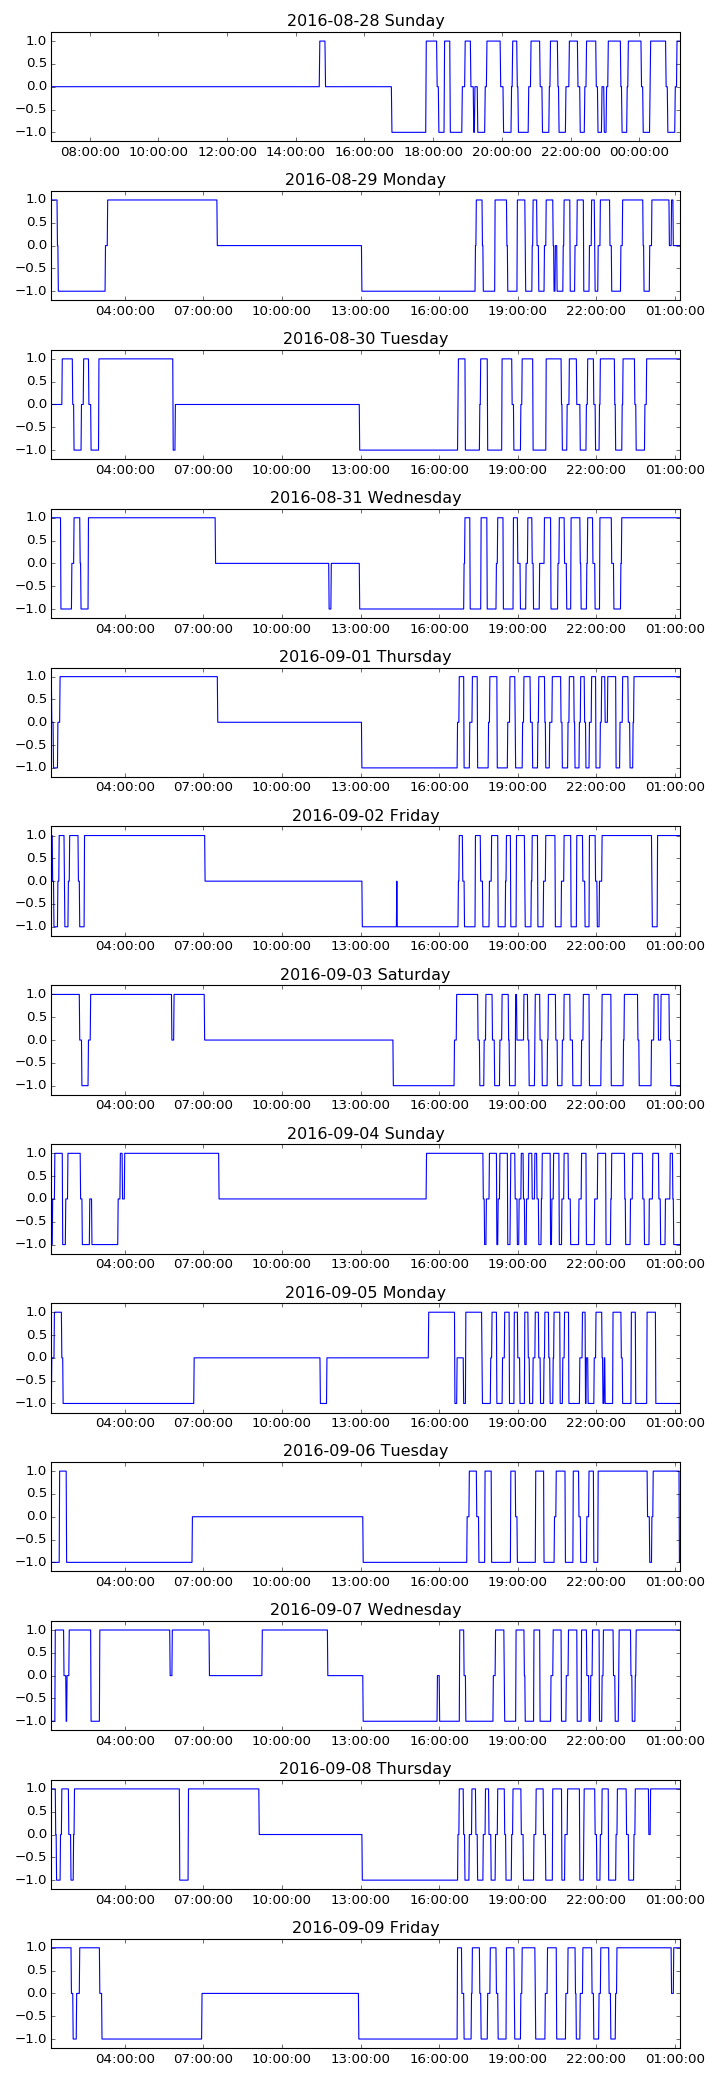

In [34]:
fig = plt.figure(figsize=(9,n_days*2))
for i in range(0,n_days):
    fig.add_subplot(n_days,1,i+1)
    before = first_datetime + datetime.timedelta(days=i)
    after = before + datetime.timedelta(days=1,seconds=-1)
    plt.plot(df.truncate(before=before,after=after)['lane2_int'])
    plt.gca().set_ylim([-1.2,1.2])
    ax = plt.gca()
    ax.xaxis_date(pytz.timezone('America/Vancouver'))
    ax.set_title(str(before.date()) + ' ' + calendar.day_name[before.weekday()])
plt.tight_layout()